# Oil Wells Selection Model

The goal of any business is to make profit. The distribution of resources is also connected with profit: it makes sense to invest the resources of the enterprise in what brings it.
Oil companies are far from an exception. The geography of oil field development is becoming more and more extensive, covering areas with extreme weather conditions, so the operation costs of oil companies are usually high. From this point of view, it is important to choose for development the region in which there will be the maximum amount of oil reserves with the best characteristics.
In this study, we will analyze data from GlavRosGosNeft, which has information on oil wells in three different regions.

Our task is to build a model that, based on the data, will predict where mining will bring the greatest profit.

We will get the above data from the following csv files: '/datasets/geo_data_0.csv', '/datasets/geo_data_1.csv', '/datasets/geo_data_2.csv'.

From the task, we know that the file contains the following features:

* id - unique identifier of the well;
* f0, f1, f2 - three signs of points that affect the stock;


Target feature:
* product - the volume of reserves in the well (thousand barrels).


**The purpose of this study** is to build a linear regression model to determine the region where drilling will bring the greatest profit. To analyze possible profits, as well as possible risks. The optimal model will be considered the one in which the value of RSME (square root of the  mean squared error) will be extremely minimal.


**Research progress**:

We will try to build a prediction model based on the data of GlavRosGosNeft about wells, to do this, we have to preprocess the data, divide the datasets into 2 samples (training and validation), train the model in the best way, check its quality on the validation sample and, further, assess the risks and profit.


Thus, this project will include the following steps:
* data preprocessing
* model fitting and quality check
* profit calculation and risk assessment


## Data Preprocessing



In [40]:
import numpy as np  # importing numpy
import pandas as pd  # importing pandas
import seaborn as sns # importing seaborn дfor plotting
import os.path as path # importing os.path for path handling
from sklearn.linear_model import LinearRegression # importing linear regression
from sklearn.metrics import mean_squared_error # importing MSE
from sklearn.model_selection import train_test_split  # importing the function for dataset splitting
import warnings # importing warnings 
warnings.simplefilter("ignore")
from scipy import stats as st # importing stats for statistics functions
from numpy.random import RandomState # importing RandomState class


Let's make the first impression on the data. To view and analyze, we will read the files in csv format, save them to variables, and also look at the first 10 lines.



In [41]:
# reading csv file and saving to reg_0
try:
    base_path = 'geo_data_0.csv' 
    reg_0 = pd.read_csv(base_path) if path.exists(base_path) else pd.read_csv(f'/datasets/{base_path}') # checking for file path
except:
     print('File not found') # if no path is correct, an error message will be printed


Next, we will get general information about the dataset and check the quality of the data, let's repeat this operation for the other two datasets.



In [42]:
reg_0.info() # getting general information on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [43]:
# reading csv file and saving to reg_1
try:
    base_path = 'geo_data_1.csv' 
    reg_1 = pd.read_csv(base_path) if path.exists(base_path) else pd.read_csv(f'/datasets/{base_path}') # checking for file path
    display(reg_1.head(10))  # getting fisrt 10 rows of the dataframe
except:
     print('File not found') # if no path is correct, an error message will be printed


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [44]:
reg_1.info() # getting general information on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [45]:
# reading csv file and saving to reg_2
try:
    base_path = 'geo_data_2.csv' 
    reg_2 = pd.read_csv(base_path) if path.exists(base_path) else pd.read_csv(f'/datasets/{base_path}') # checking for file path
    display(reg_2.head(10))  # getting fisrt 10 rows of the dataframe
except:
     print('File not found') # if no path is correct, an error message will be printed


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [46]:
reg_2.info() # getting general information on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


So, in each dataset there are 100,000 objects. The data type in each of them corresponds to the declared feature, at first glance, none of the datasets contains missing values. Let's check this assumption:



In [47]:
for df in [reg_0, reg_1, reg_2]: # iterating over the list of dataframes
    print(df.isna().mean()) # checking for missing values

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64
id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64


As expected, there are no missing values, and this will positively affect the quality of the models.



Let's also check if there are duplicates  in our datasets: since the well ID is unique, in the presented data, each object must be unique:



In [48]:
for df in [reg_0, reg_1, reg_2]: # iterating over the list of dataframes
    print(df.duplicated().sum()) # checking for full duplicates

0
0
0


So, there are no full duplicates in our dataframes, each object is unique.
Further, in order to exclude possible multicollinearity, we will study the correlation in the quantitative features of the data. To do this, we shall try to present our dataset graphically and analyze if there is a correlation, and what is its strength between individual features. Further, for the same purpose, we will display the value of the correlation between features using a heatmap.



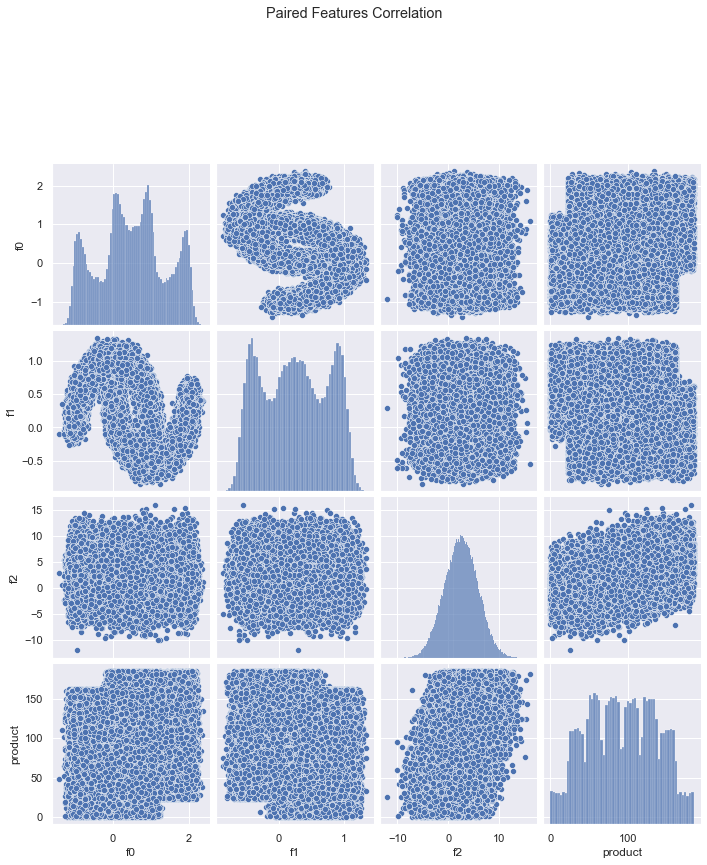

In [49]:
ax = sns.pairplot(reg_0.drop(columns=['id']))  # plotting pairplot to analyze correlations
sns.set(rc = {'figure.figsize':(24,24)}) # setting the plot size
ax.fig.suptitle('Paired Features Correlation', y=1.2); # setting the plot title

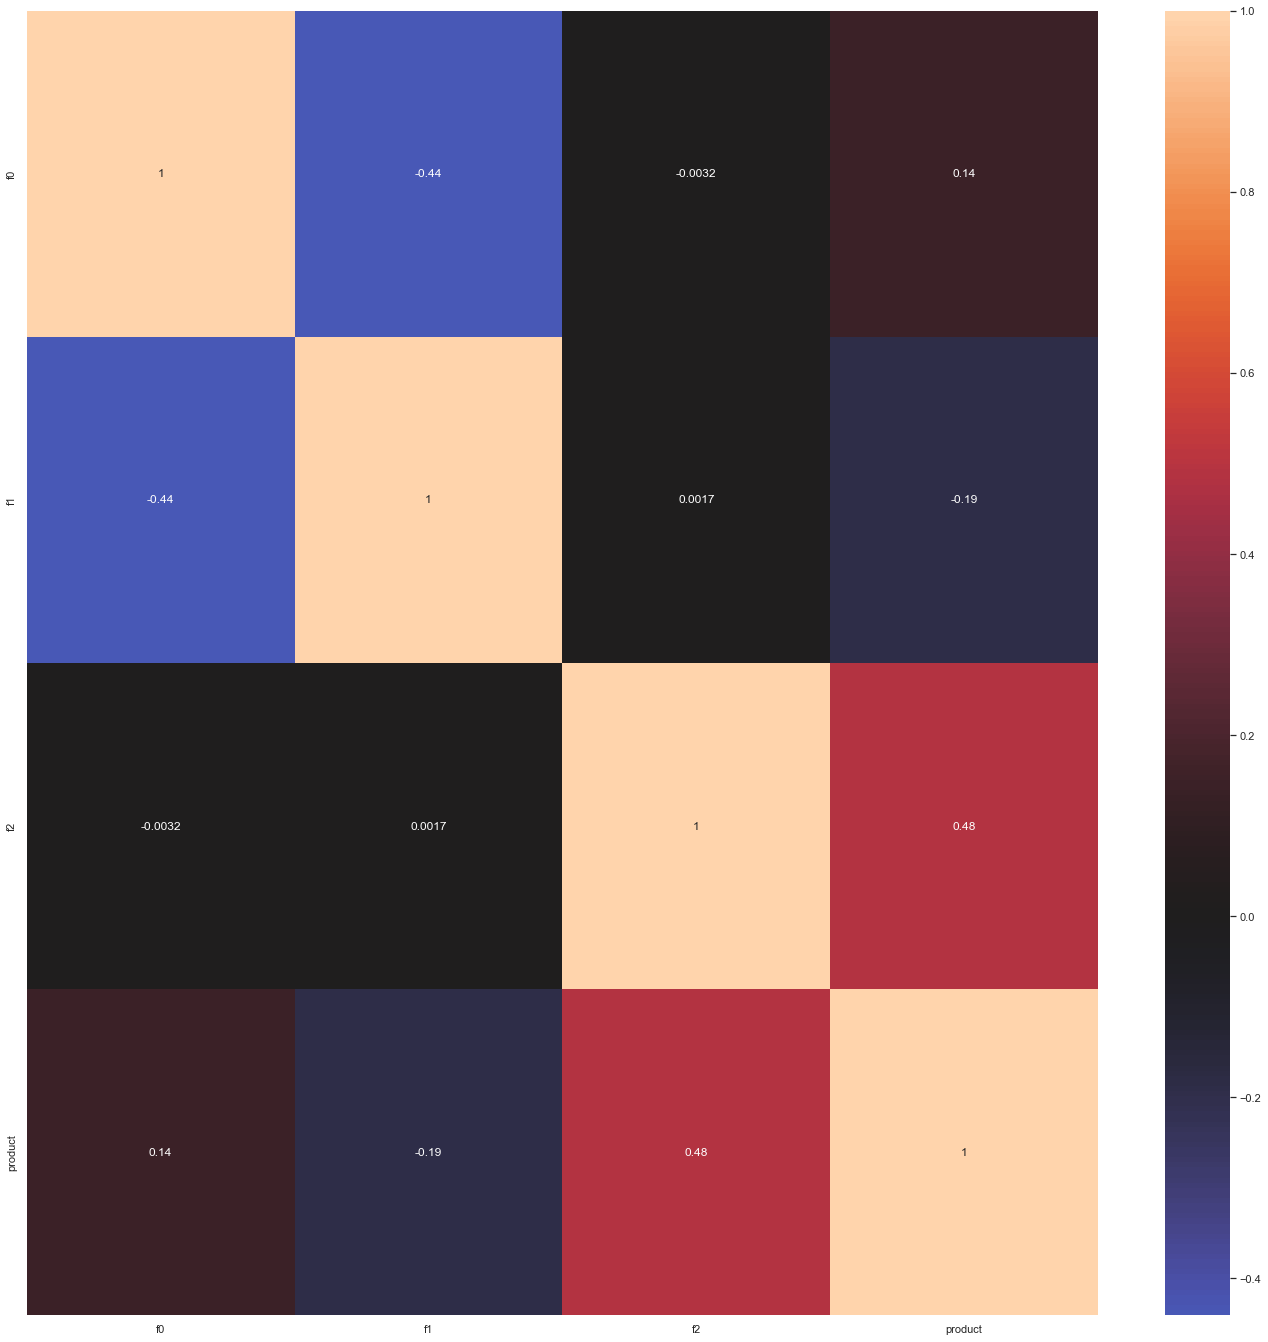

In [50]:
sns.heatmap(reg_0.corr(), center=0, annot=True) # plotting a heatmap to evaluate correlation values
sns.set(rc = {'figure.figsize':(8,8)}); # setting the plot size


Looking at the plot, we may see a noticeable correlation between the features f1 and f0, as well as f2 and the target "product". The same hypothesis is confirmed by the heat map, on which we see specific correlation coefficients: indeed, for these two pairs they are the highest, and if in 44% of cases f1 increases with a decrease in f2, thus, the correlation is negative, then the correlation between the last two is positive and amounts to almost 0.5. Naturally, the value of -0.44 is not enough to claim that we will face the problem of multicollinearity of features f1 and f0 when building a model for the first region.



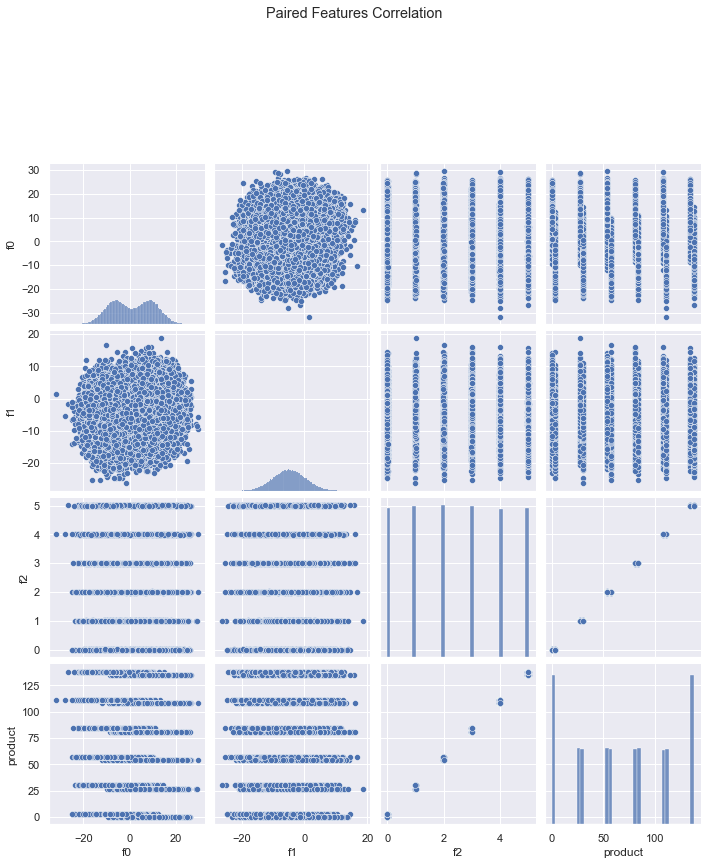

In [51]:
ax = sns.pairplot(reg_1.drop(columns=['id']))  # plotting pairplot to analyze correlations
sns.set(rc = {'figure.figsize':(24,24)}) # setting the plot size
ax.fig.suptitle('Paired Features Correlation', y=1.2); # setting the plot title

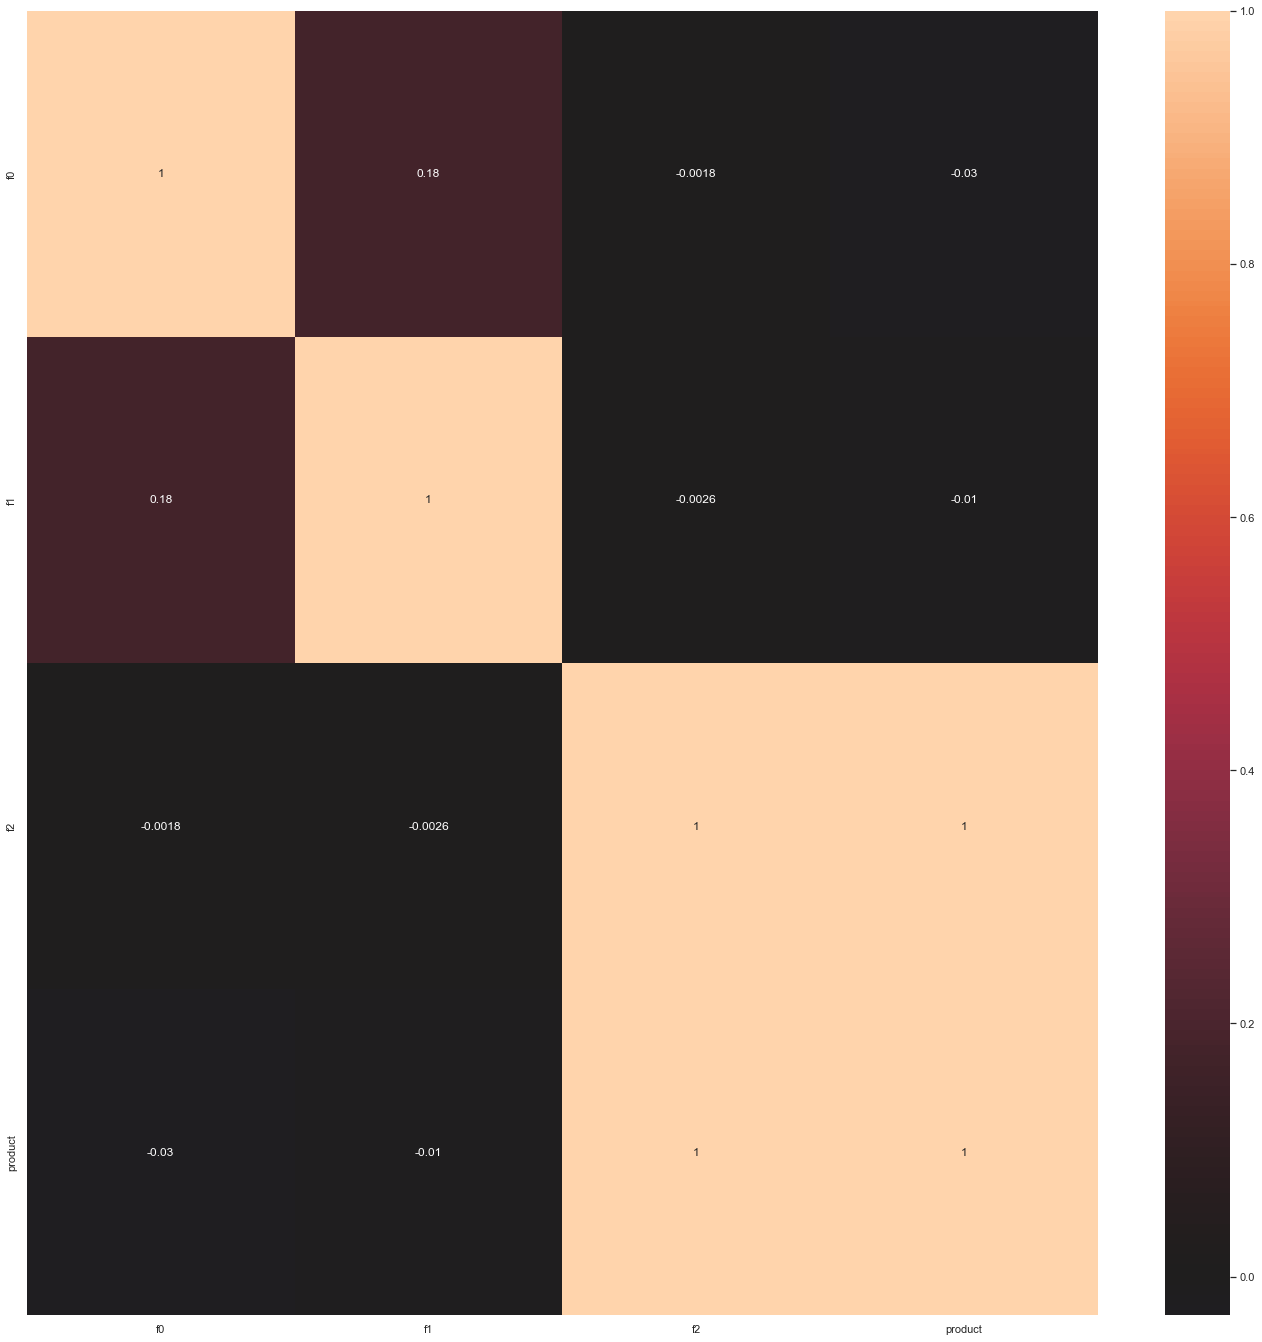

In [52]:
sns.heatmap(reg_1.corr(), center=0, annot=True) # plotting a heatmap to evaluate correlation values
sns.set(rc = {'figure.figsize':(8,8)}); # setting the plot size


As for the second region, the correlation coefficient between almost all features is insignificant, however, it is maximum, that is, equal to 1, for the f2 feature and the "product" target feature. This correlation will be very useful in terms of the quality of the linear regression model.



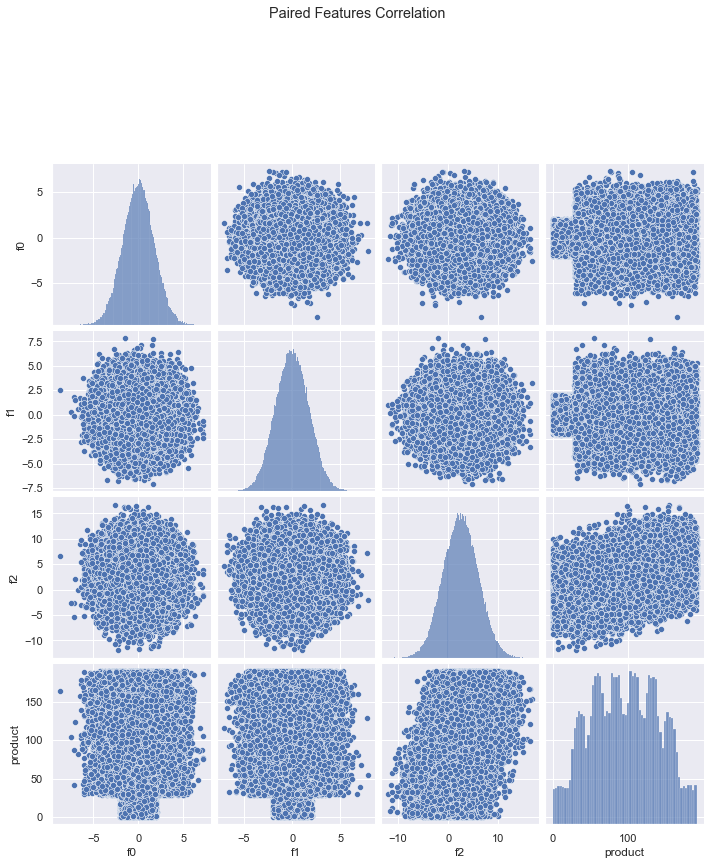

In [53]:
ax = sns.pairplot(reg_2.drop(columns=['id']))  # plotting pairplot to analyze correlations
sns.set(rc = {'figure.figsize':(24,24)}) # setting the plot size
ax.fig.suptitle('Paired Features Correlation', y=1.2); # setting the plot title

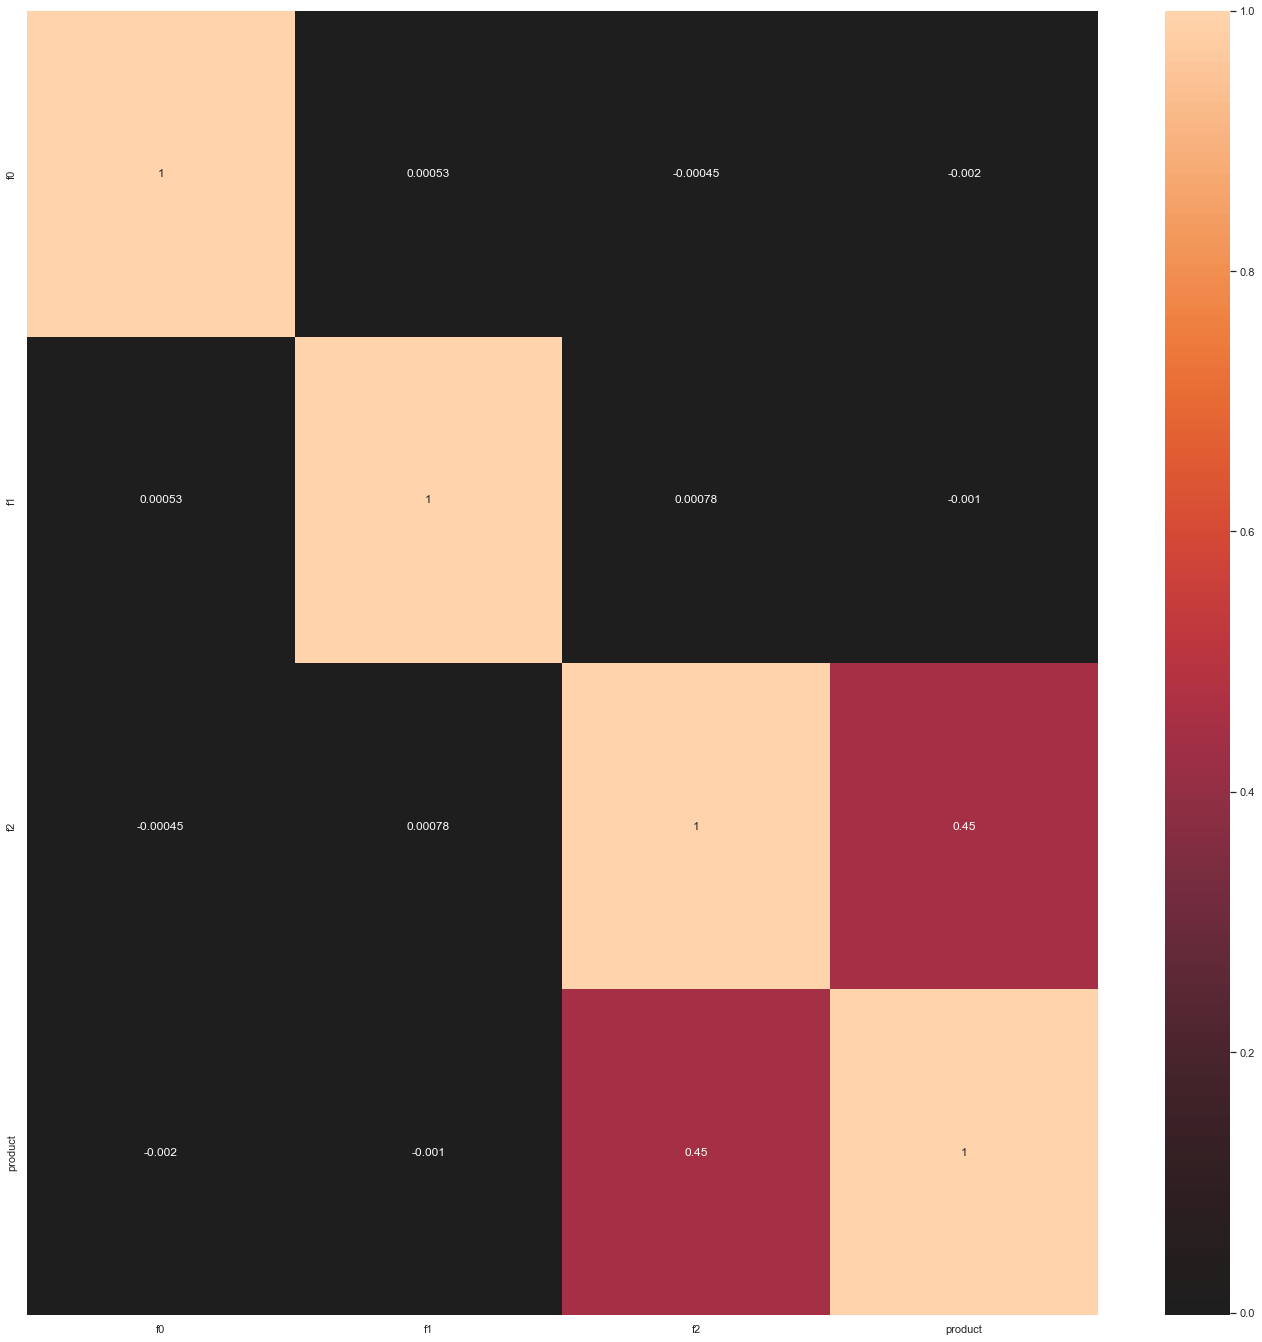

In [54]:
sns.heatmap(reg_2.corr(), center=0, annot=True) # plotting a heatmap to evaluate correlation values
sns.set(rc = {'figure.figsize':(8,8)}); # setting the plot size


As for the third region, according to the obtained correlation coefficients, we are unlikely to encounter the problem of multicollinearity, in general, the situation is similar to the second regions, the strongest correlation is observed between the target feature and f2, it is also positive, but more than two times weaker than in the previous case (0.45).



So, our goal is to predict the volume of the wells. There can be many answers to this question, these will be specific numbers, so our target feature is quantitative, and we are solving a regression problem.
Regression takes quantitative features as input, from this point of view, our datasets are almost ready, there is no need to conduct OHE or apply other similar techniques. The only qualitative variable is the well identification number, represented as a string. Since this feature does not have any meaning for predicting the target feature and, in any case, it can be easily restored later in the datasets, before building models, we will clear the data from it:



In [55]:
for df in [reg_0, reg_1, reg_2]: # # iterating over the list of dataframes
    df.drop(columns=['id'], inplace=True) # deleting the selected feature
    print(df.columns) # visualizing the result


Index(['f0', 'f1', 'f2', 'product'], dtype='object')
Index(['f0', 'f1', 'f2', 'product'], dtype='object')
Index(['f0', 'f1', 'f2', 'product'], dtype='object')


According to the assignment, the model to be built and fit is logistic regression. We know that it is quite sensitive to outliers. We also know that not all observations that will be outliers in terms of statistics will be outliers for regression, moreover, sometimes outliers can be useful.
Since for the time-being we do not have a method at our disposal to check whether a certain value will be an outlier in terms of regression, we will nevertheless clear the dataframes from the so-called outliers in the classical way - leaving in the datasets the values that fall to the right and left of 1 .5 interquartile range from the median.
To optimize cleanup, let's define the following function:



In [56]:
# defining a function to clean the dataframes from outliers
def outlier_cleaning(df):
    Q1 = df.quantile(q=0.25)
    Q3 = df.quantile(q=0.75)
    IQR = df.apply(st.iqr)
    cleaned_df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]
    return cleaned_df

In [57]:
cleaned_reg_0 = outlier_cleaning(reg_0) # applying the function to the region 1 dataframe
print(len(cleaned_reg_0)) # checking the result

99494


In [58]:
cleaned_reg_1 = outlier_cleaning(reg_1) # applying the function to the region 2 dataframe
print(len(cleaned_reg_1)) # checking the result

99363


In [59]:
cleaned_reg_2 = outlier_cleaning(reg_2) # applying the function to the region 3 dataframe
print(len(cleaned_reg_2)) # checking the result

98004


So, we saw that the number of outliers in regions 1 and 2 was less than 1% of all observations, and in the third region - almost 2%. This is an acceptable amount.



Let's move on to splitting the dataframes into samples: training and validation, we know from the assignment that datasets should be divided in a ratio of 75:25. As you know, we need a validation set to prevent overfitting of the model. When splitting, we will set the random_state parameter to fix the results of the split.



In [60]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(cleaned_reg_0.drop(
    columns=['product']), cleaned_reg_0['product'], 
                 test_size=0.25, random_state=12345) # splitting the data into training and validation datasets

In [61]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(cleaned_reg_1.drop(
    columns=['product']), cleaned_reg_1['product'],
                 test_size=0.25, random_state=12345) # splitting the data into training and validation datasets

In [62]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(cleaned_reg_2.drop(
    columns=['product']), cleaned_reg_2['product'], 
                test_size=0.25, random_state=12345) # splitting the data into training and validation datasets

Next, for each dataset, we will check whether the split result meets our expectations:



In [63]:
print(len(cleaned_reg_0), len(features_train_0), len(features_valid_0)) # visualizing the row number in the dfs
len(cleaned_reg_0) == len(features_train_0) + len(features_valid_0) # checking the equity
    

99494 74620 24874


True

In [64]:
print(len(cleaned_reg_1), len(features_train_1), len(features_valid_1)) # visualizing the row number in the dfs
len(cleaned_reg_1) == len(features_train_1) + len(features_valid_1) #  checking the equity

99363 74522 24841


True

In [65]:
print(len(cleaned_reg_2), len(features_train_2), len(features_valid_2)) # visualizing the row number in the dfs
len(cleaned_reg_2) == len(features_train_2) + len(features_valid_2) #  checking the equity

98004 73503 24501


True

**Conclusions:**

So, the samples are ready, their size is checked and corresponds to the specified parameters. We can move on to the next step - building and testing the quality of the model.


In [66]:
# defining a function for linear regression fitting and calculating necessary metrics:
def modelling(features_train, target_train, features_valid, target_valid):
    model = LinearRegression() 
    model.fit(features_train, target_train) 
    predictions_valid = pd.Series(model.predict(features_valid)) 
    rmse = mean_squared_error(target_valid, predictions_valid)**0.5 
    mean = predictions_valid_0.mean() 
    print(f'Model quality metric is {rmse}, while the predicted average volume is {mean}.') 

Let's begin from the 1st region:

In [67]:
modelling(features_train_0, target_train_0, features_valid_0, target_valid_0)

Model quality metric is 37.92293089053146, while the predicted average volume is 92.72476770114889.


Let's see if the model of the second region differs according to the selected metrics:



In [68]:
modelling(features_train_1, target_train_1, features_valid_1, target_valid_1)

Model quality metric is 0.8890307022067059, while the predicted average volume is 92.72476770114889.


The difference is obvious. We can assume that the much higher quality of the model for region 2 is due to the maximum positive correlation we found between one of the features and the target variable.

Finally, let's move on to the last, third model in a row:



In [69]:
modelling(features_train_2, target_train_2, features_valid_2, target_valid_2)

Model quality metric is 40.116670311801556, while the predicted average volume is 92.72476770114889.


The model for the third region is comparable in terms of quality, as well as the average predicted volume of oil with the first one.

Next, we will define another function that will return predictions of the target feature:



In [70]:
# defining a function to get predictions on the target:
def prediction(features_train, target_train, features_valid, target_valid):
    model = LinearRegression() #  
    model.fit(features_train, target_train) # 
    predictions_valid = pd.Series(model.predict(features_valid)) 
    return predictions_valid

In [71]:
predictions_valid_0 = prediction(features_train_0, target_train_0, features_valid_0, target_valid_0)

In [72]:
predictions_valid_1 = prediction(features_train_1, target_train_1, features_valid_1, target_valid_1)

In [73]:
predictions_valid_2 = prediction(features_train_2, target_train_2, features_valid_2, target_valid_2)

**Conclusions**

So, when testing 3 models on the validation data, an obvious leader was revealed - the model for the second region, which value of the square root of the mean square error is several times less than the ones the other two models. The predicted average reserve for the 2nd region is significantly lower than for the other two, however, the value of the RMSE just tells us that the remaining 2 models overestimated the volume of the oil reserve, which we checked by comparing the prediction and the target of the validation sample.



 ## Preparation for Profit Calculations

Let's move on to calculating profit. First of all, let's declare the variables known to us from the task, namely:
  - the maximum budget for the development of any region (10 billion rubles.)
  - price per 1000 barrels (450 thousand rubles)
  - a calculated variable in which we will keep the minimum reserve in barrels for each well


In [74]:
BUDGET = 10000000000 # setting the budget
BARREL_PRICE = 450000 #  setting the price for 1000 brls
MIN_PER_HOLE = BUDGET / BARREL_PRICE / 200 #  calculating the minimum hole volume
MIN_PER_HOLE #  visualizing the result


111.11111111111111

Thus, to avoid losing money, the oil reserve in the well should be just over 111,000 barrels.
Let's compare this value with the average reserve for all known wells in the region. To do this, we will write a small function:



In [75]:
# creating a function to compare the average hole volume per region with the minimum
def check_volume(df):
    difference = df['product'].mean() - MIN_PER_HOLE
    profit = difference * BARREL_PRICE
    loss = abs(difference * BARREL_PRICE)
    if difference == 0:
        print('The average hole volume is enough to cover the expoitation costs.')
    elif difference > 0:
        print(f'The average hole volume is higher than the minimum one at {difference} bbls. Profit of {profit} rubles per hole will take place.')
    else:
        print(f'The average hole volume is lower than the minimum one at {abs(difference)} bbls. Loss of {loss} rubles per hole will take place.')

In [76]:
check_volume(reg_0) # applying the function to the 1 region

The average hole volume is lower than the minimum one at 18.6111111111111 bbls. Loss of 8374999.999999995 rubles per hole will take place.


In [77]:
check_volume(reg_1) # applying the function to the 2 region

The average hole volume is lower than the minimum one at 42.2861111111111 bbls. Loss of 19028749.999999993 rubles per hole will take place.


In [78]:
check_volume(reg_2) # applying the function to the 3 region

The average hole volume is lower than the minimum one at 16.11111111111107 bbls. Loss of 7249999.999999982 rubles per hole will take place.


**Conclusions**

So, based on the results of calculating the well average reserve and the minimum required reserve volume, taking into account the development budget, we can conclude that none of the regions will be profitable, the development of the 3rd region will lead to the least losses, while the development of 2 other regions will lead to even higher (almost 3 times) losses.
Nevertheless, average indicators are not the best option for our task, since each region has 100,000 objects, from which we should choose only the top 200 for development. Let's try to make such a sample at the next stage of the study.



## Profit and Risk Calculations

So, in order to make the process automatic, first of all, we will create a function that will calculate the profit (that is, we will take into account the development budget), choosing those 200 wells for which we got the highest predicted reserves:



In [79]:
# creating a function to calculate profit from the best 200 holes based on the predicted values
def calculate_profit(target, prediction):
    prediction_sorted = prediction.sort_values(ascending=False)
    selected = target[prediction_sorted.index][:200]
    return selected.sum() * BARREL_PRICE - BUDGET

Let's apply the function to all 3 regions:

In [80]:
profit_0 = calculate_profit(target_valid_0.reset_index(drop=True), 
                              predictions_valid_0) # calculatin the 1 region profit
profit_0 # checking the result

3346905536.4543247

In [81]:
profit_1 = calculate_profit(target_valid_1.reset_index(drop=True), 
                              predictions_valid_1) # calculatin the 2 region profit
profit_1 # checking the result

2415086696.681511

In [82]:
profit_2 = calculate_profit(target_valid_2.reset_index(drop=True), 
                              predictions_valid_2) # calculatin the 3 region profit
profit_2 # checking the result

2475150920.187195

So, based on the values of the reserves predicted by the model, for all 3 regions we will receive a profit of approximately 2-3 billion rubles, depending on the region.

Next, to verify the result, we will apply the Bootstrap technique and, by forming subsamples, we will find the profit distribution. To do this, we will define another function, from the assignment we know that during the exploration of the region, 500 points are explored, from which the best 200 are selected for development. In addition, for each region, we need to determine a 95% confidence interval, that means, to calculate in which interval the profit values will be located with a probability of 95%.



In [83]:
# defining a function to check the profit distribution assess the set confidence interval and eventual risks
def booty(target, prediction):
    state = np.random.RandomState(12345)
    values = []
    count = 0
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        pred_subsample = prediction[target_subsample.index]
        result = calculate_profit(target_subsample, pred_subsample)
        values.append(result)
        if result < 0:
            count += 1 
    values = pd.Series(values)
    risk = (values < 0).mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975) 
    print(f'Average profit in the region is {values.mean()} with the risk of {risk*100} %')
    print(f'95% confidence interval in the region varies from {lower} to {upper}')

Let's apply the function to the regions one by one

 * 1st region:

In [84]:
booty(target_valid_0.reset_index(drop=True), predictions_valid_0) # checking the result

Average profit in the region is 397866695.0062682 with the risk of 8.3 %
95% confidence interval in the region varies from -141319256.52284712 to 922527258.1410652


 * 2nd region:

In [85]:
booty(target_valid_1.reset_index(drop=True), predictions_valid_1) # checking the result

Average profit in the region is 498595451.84587705 with the risk of 1.0999999999999999 %
95% confidence interval in the region varies from 55951210.033648446 to 922166301.422245


 * 3rd region:

In [86]:
booty(target_valid_2.reset_index(drop=True), predictions_valid_2) # checking the result

Average profit in the region is 341683672.403579 with the risk of 11.600000000000001 %
95% confidence interval in the region varies from -206014230.25206006 to 903366241.7033111


**Conclusions**

According to assessment of the obtained results , the only region suitable for development, which did not exceed the risk threshold of 2.5%, **is the second region**. The same region, as a result of a multiple check of the average profit values, showed the highest average profit, and only positive values fell into the selected 95% confidence interval.



## Study Results

In the course of this study, we prepared the data in order to subsequently build, fit 3 linear regression models on 3 datasets corresponding to 3 different regions.

We tested the results of model fitting on validation data, previously selected from general datasets.
According to the results of the comparison, it turned out that the volume of oil reserves in holes is predicted better by **linear regression model built on data for the 2nd region.** It can be assumed that the high quality of this model (very low RSME value, less than 1) is due to 100% correlation between one of the features and the target variable.

Next, for each model, based on the top 200 predicted volumes, we calculated the average profit from 200 corresponding real holes reserves. The results were satisfactory, as we made a profit in all three regions.

Naturally, this result cannot be considered 100% reliable, it could turn out to be random given the amount of data, so using the bootstrap technique, we analyzed the distribution of average profit values from 200 out of 500 holes sampled 1000 times. According to the results, in this case, **the best for development is the 2nd region with an average profit of approx. RUB 499 mln and 1% loss risk**

